* Student Name:  Ndanu Mwatu
* Student Pace:  Part Time
* Date:          24th October 2023
* Phase:         Phase 3 Project

<img src="image_investment-5318530_1280.jpg" width="400" height="50" align="left">

Image by Tumisu from Pixabay

<hr style="border:1px solid gray">

# Bank Customers Attrition Prediction

**Author:** Ndanu Mwatu

<hr style="border:1px solid gray">

### Outline:
1. 0 Overview
2. 0 Business Problem
3. 0 Data Understanding
4. 0 Data Preparation / Preprocessing
5. 0 Data Modelling and Evaluation
    * 1.Logistic Regression Modelling
    * 2.Decision Trees Modelling
    * 3.Random Forest Modelling
    * 4.Overall Best Model Evaluation
6. 0 Conclusions, Recommendations and Next Steps

<hr style="border:1px solid gray">

## 1.0 Overview

This project seeks to create a classification model to be used by the client -ABC Multinational Bank- to predict customer attrition (loss of clients) by analyzing various attributes of account holders at the Bank. 

<hr style="border:1px solid gray">

## 2.0 Business Problem

In the recent years, ABC Multinational Bank has grown concerned over the rate of customers who exit the Bank, leading to declining profits, inability to plan for the long term, and the risk of compromised credit facilities.The Bank's management has sadly noted that about 1 in 5 customers has been leaving the Bank, but they are unable to know exactly who will leave.

The Bank wants to design intervention measures to mitigate against loss of customers to their competitors, thereby ensuring maximum customer retention. Additionally, such insights would guide the Bank in mitigation against the risk of clients leaving without complete loan payments. 

As such, the Bank has provided data on their account holders; including past customers who have left the Bank or remained. The task is to create a classificaton model that would help the client identify customers who may leave -early enough, before they leave- that the Bank may apply appropriate mitigation measures to attract them to stay on.

<hr style="border:1px solid gray">

## 3.0 Data Understanding

<img src="image_finance-586405_1280.jpg" width="350" height="50" align="left">

Image by Gerd Altmann from Pixabay

**Introduction**

This project will utilize customer data of account holders at ABC Multinational Bank, downloaded from [Kaggle](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset) to predict customer attrition (loss of clients). The dataset contains customer attributes such as credit_score, gender, age, balance, estimated salary amongst others; as well as information on customers who have left or stayed in the Bank (Churn).

In this section, we shall begin by importing necessary libraries and functions; load the data;
and explore the dataset to gain a deeper understanding of it.

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import log_loss
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv('Bank Customer Churn Prediction.csv')
#preview the dataset
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


As can be seen from the dataframe, our dataset contains 10,000 rows each having 11 feature columns and 1 target column. The target column 'churn', is a 1 if the client has left the bank during some period or 0 if he/she has not.

We continue the data exploration.

In [4]:
# Check dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


From the information about the features, we note that:
* Some features are categorical (type object) while others are numeric (type int64 and float64)
* There are no missing values in any of the columns

We then get a summary of descriptive statistics.

In [5]:
# Get a summary of descriptive statistics
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


We note from the descriptive statistics that;
* The features in the numeric columns are not in the same scale

In [6]:
# Exploring the distribution of the target feature (Churn)
print("Raw Counts:")
print(df["churn"].value_counts())
print()
print("Percentages:")
print(df["churn"].value_counts(normalize=True))

Raw Counts:
0    7963
1    2037
Name: churn, dtype: int64

Percentages:
0    0.7963
1    0.2037
Name: churn, dtype: float64


We note that:

* This is an imbalanced dataset, since customers who have left the bank are relatively fewer than those who stay. 

* About 20% of customers have left the bank at some point, while 79.6% have not left. 

* Therefore, if we had a 'dummy' model, that always predicted that no customer would leave the bank(class 0), it would be 79.6% accurate.

<hr style="border:1px solid gray">

## 4.0 Data Preparation / Preprocessing

**Introduction**

To prepare the data for analysis, the following steps are carried out;
* Define X (predictors) and y (target)
* Split the data into training and test sets 
* Preprocessing/cleaning:
    * check for missing values
    * deal with categorical data using one hot encoding 
    * Normalize/standardize numeric features

Preprocessing is carried out after splitting the data i.e. separately for the train and test sets; to prevent data leakage into the test sets.

**4.1 Define X and y**

* We set y as the as the target variable 'churn'
* We set X as the predictors. We exclude the target variable. We also exclude customer_id column as it's not a true feature.


In [7]:
y = df['churn']
X = df.drop(columns=['churn', 'customer_id'], axis=1)

**4.2 Split the data into training and test sets**

We use a random_state of 42 for reproducibility; and the default 75% train/25% test proportions.

In [8]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**4.3 Preprocessing**

Preprocessing is done for the separate train and test sets to avoid data leakage thus allow proper generalizing

**i. Check for missing data**

In [9]:
# From the EDA stage, we saw there was no missing data and this is confirmed;
X_train.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
dtype: int64

**ii. Deal with categorical data - using one hot encoding**

As seen during EDA, some features have categorical data (object data type) and need to be converted to numeric data types for modelling purposes, using dummy one hot encoded variables. 


In [10]:
#check categorical and numeric columns
X_train.info() #preprocessing to be done separately for train and test data to avoid data leakage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 4901 to 7270
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      7500 non-null   int64  
 1   country           7500 non-null   object 
 2   gender            7500 non-null   object 
 3   age               7500 non-null   int64  
 4   tenure            7500 non-null   int64  
 5   balance           7500 non-null   float64
 6   products_number   7500 non-null   int64  
 7   credit_card       7500 non-null   int64  
 8   active_member     7500 non-null   int64  
 9   estimated_salary  7500 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 644.5+ KB


In [11]:
# Separate the categorical data columns
X_train_categorical = X_train.select_dtypes(exclude=["int64", "float64"]).copy()
X_train_categorical

,country,gender
4901,France,Male
4375,Germany,Male
6698,France,Female
9805,France,Male
1101,Spain,Male
...,...,...
5734,France,Male
5191,France,Female
5390,France,Female
860,France,Male


In [12]:
# Separate the numeric data columns
X_train_numeric = X_train.select_dtypes(include='number').copy()
X_train_numeric

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4901,673,59,0,178058.06,2,0,1,21063.71
4375,850,41,8,60880.68,1,1,0,31825.84
6698,725,31,6,0.00,1,0,0,61326.43
9805,644,33,7,174571.36,1,0,1,43943.09
1101,703,29,9,0.00,2,1,0,50679.48
...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05
5191,682,58,1,0.00,1,1,1,706.50
5390,735,38,1,0.00,3,0,0,92220.12
860,667,43,8,190227.46,1,1,0,97508.04


In [13]:
# convert categorical variables into dummy one-hot encoded variables
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

ohe.fit(X_train_categorical)
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    index=X_train_categorical.index,
    columns=np.hstack(ohe.categories_)
)
X_train_ohe

,France,Germany,Spain,Female,Male
4901,1.0,0.0,0.0,0.0,1.0
4375,0.0,1.0,0.0,0.0,1.0
6698,1.0,0.0,0.0,1.0,0.0
9805,1.0,0.0,0.0,0.0,1.0
1101,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
5734,1.0,0.0,0.0,0.0,1.0
5191,1.0,0.0,0.0,1.0,0.0
5390,1.0,0.0,0.0,1.0,0.0
860,1.0,0.0,0.0,0.0,1.0


In [14]:
# At this stage, we concatenate the onehot encoded data and the numeric data  
X_train_full = pd.concat([X_train_numeric, X_train_ohe], axis=1)
X_train_full

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,France,Germany,Spain,Female,Male
4901,673,59,0,178058.06,2,0,1,21063.71,1.0,0.0,0.0,0.0,1.0
4375,850,41,8,60880.68,1,1,0,31825.84,0.0,1.0,0.0,0.0,1.0
6698,725,31,6,0.00,1,0,0,61326.43,1.0,0.0,0.0,1.0,0.0
9805,644,33,7,174571.36,1,0,1,43943.09,1.0,0.0,0.0,0.0,1.0
1101,703,29,9,0.00,2,1,0,50679.48,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,1.0,0.0,0.0,0.0,1.0
5191,682,58,1,0.00,1,1,1,706.50,1.0,0.0,0.0,1.0,0.0
5390,735,38,1,0.00,3,0,0,92220.12,1.0,0.0,0.0,1.0,0.0
860,667,43,8,190227.46,1,1,0,97508.04,1.0,0.0,0.0,0.0,1.0


**iii. Normalizing/standardizing numeric features**

Since the features are on different scales,as seen during EDA, some features may impact the model more heavily than others. We thus normalize all features to a consistent scale using a StandardScaler. This scaled data will be used for model types that require scaling i.e. Logistic regression. The unscaled data will be used in model types that don't require scaling i.e Decision trees and Random forest.

In [15]:
# Instantiate StandardScaler
scaler = StandardScaler()
# Fit to the training data numeric features
scaler.fit(X_train_full)
# Transform the training data
X_train_full_scaled = pd.DataFrame(
    scaler.transform(X_train_full),
    index=X_train_full.index,
    columns=X_train_full.columns
)
X_train_full_scaled

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,France,Germany,Spain,Female,Male
4901,0.218351,1.916619,-1.731689,1.629928,0.813111,-1.539736,0.969789,-1.382844,1.000533,-0.577761,-0.577350,-0.911867,0.911867
4375,2.057280,0.202109,1.041750,-0.246244,-0.911043,0.649462,-1.031152,-1.195890,-0.999467,1.730820,-0.577350,-0.911867,0.911867
6698,0.758602,-0.750397,0.348390,-1.221027,-0.911043,-1.539736,-1.031152,-0.683422,1.000533,-0.577761,-0.577350,1.096651,-1.096651
9805,-0.082942,-0.559895,0.695070,1.574101,-0.911043,-1.539736,0.969789,-0.985396,1.000533,-0.577761,-0.577350,-0.911867,0.911867
1101,0.530034,-0.940898,1.388429,-1.221027,0.813111,0.649462,-1.031152,-0.868375,-0.999467,-0.577761,1.732051,-0.911867,0.911867
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.205347,1.440366,1.041750,-0.104830,-0.911043,0.649462,0.969789,-0.543502,1.000533,-0.577761,-0.577350,-0.911867,0.911867
5191,0.311856,1.821368,-1.385009,-1.221027,-0.911043,0.649462,0.969789,-1.736478,1.000533,-0.577761,-0.577350,1.096651,-1.096651
5390,0.862496,-0.083643,-1.385009,-1.221027,2.537266,-1.539736,-1.031152,-0.146754,1.000533,-0.577761,-0.577350,1.096651,-1.096651
860,0.156015,0.392610,1.041750,1.824777,-0.911043,0.649462,-1.031152,-0.054895,1.000533,-0.577761,-0.577350,-0.911867,0.911867


**iv. Preprocess the test data separately**

* The test data is preprocessed separately to avoid data leakage. The same preprocessing steps carried out for training data apply, paying attention not to fit transformers on test data.
* Test data will be used to evaluate the model's performance on unseen data. 

In [16]:
# Preprocess test data separately 

# i. Deal with categorical data for test data - using one hot encoding

# Separate the categorical test data
X_test_categorical = X_test.select_dtypes(exclude=["int64", "float64"]).copy()

# Separate the numeric test data
X_test_numeric = X_test.select_dtypes(include='number').copy()

# convert categorical test variables into dummy one-hot encoded variables
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    index=X_test_categorical.index,
    columns=np.hstack(ohe.categories_)
)

# at this stage we concatenate the one hot encoded data and the numeric data
X_test_full = pd.concat([X_test_numeric, X_test_ohe], axis=1)

# we normalize/standardize the test data
X_test_full_scaled = pd.DataFrame(
    scaler.transform(X_test_full),
    index=X_test_full.index,
    columns=X_test_full.columns
)

X_test_full_scaled

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,France,Germany,Spain,Female,Male
6252,-0.581635,-0.655146,-0.691649,0.327418,0.813111,-1.539736,-1.031152,-1.022827,-0.999467,1.730820,-0.577350,-0.911867,0.911867
4684,-0.301120,0.392610,-1.385009,-1.221027,0.813111,0.649462,0.969789,0.794069,1.000533,-0.577761,-0.577350,-0.911867,0.911867
1731,-0.529688,0.487861,-0.344970,-1.221027,0.813111,0.649462,-1.031152,-0.731457,-0.999467,-0.577761,1.732051,1.096651,-1.096651
4742,-1.516684,1.916619,1.041750,0.686762,0.813111,0.649462,0.969789,1.216203,-0.999467,1.730820,-0.577350,-0.911867,0.911867
4521,-0.955654,-1.131399,0.695070,0.780331,-0.911043,0.649462,0.969789,0.243229,-0.999467,-0.577761,1.732051,1.096651,-1.096651
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,-0.072553,1.535617,-1.385009,0.919320,-0.911043,-1.539736,0.969789,-1.451778,-0.999467,-0.577761,1.732051,1.096651,-1.096651
7025,-0.862150,1.154615,-0.691649,-1.221027,2.537266,0.649462,-1.031152,-0.444417,-0.999467,-0.577761,1.732051,1.096651,-1.096651
7647,1.205347,-1.321900,-1.731689,0.034202,-0.911043,0.649462,0.969789,-1.604287,1.000533,-0.577761,-0.577350,-0.911867,0.911867
7161,0.394972,-0.274144,0.348390,0.547918,-0.911043,-1.539736,-1.031152,-0.336586,1.000533,-0.577761,-0.577350,1.096651,-1.096651


<hr style="border:1px solid gray">

## 5.0 Data Modeling and Evaluation 
**Introduction**

In order to bring clarity to the Client (ABC Bank), on the question of *'Which customers are likely to leave ABC Bank?'* we shall build and analyse several models; then propose for use to the client, the best performing one.  

3 types of models shall be built as listed below;
1. Logistic regression models
2. Decision Trees models
3. Random Forest models

**Iterative Approach**

An iterative approach will be adopted for data modelling, whereby, for each model type a baseline model will be prepared, followed by tuning of hyperparameters in creating iterative models and selecting the best estimator for that model type. This selection of the best performing classifier will be based on the performance as gauged by the evaluation metrics. Finally, we shall identify the overall best performing classifier and evaluate it's performance on test data. 

The modelling will follow this outlined fashion;

    i. Logistic Regression Modelling
        -Establish Baseline Logistic Regression model
        -Create Iterative Logistic Regression models - and determine the best one 
    ii. Decision Trees Modelling
        -Establish Baseline Decision Tree model
        -Create Iterative Decision Tree models - and determine the best one 
    iii. Random Forest Modelling
        -Establish Baseline Random Forest model
        -Create Optimal Random Forest Iterative Model - using GridSearchCV
        -Investigate Feature Importances of the Random Forest Models
    iv. Evaluate the Overall Best Model    

**Evaluation Metrics of models performance**

For this project we shall use log loss and cross_val_score on the training data; to evaluate and compare the various models performance during iterative processes; as well as for comparing the different model types performance. A lower log loss would indicate a better performing model. Therefore, as we tune the hyperparameters of the various models, we will be hoping to minimize log loss.

We shall make use of ROC curve and AUC, when investigating the best hyperparameters for some models.

At the final stage, the overall best model shall be assessed using other evaluation metrics i.e.  Precision, Recall, Accuracy and f1 Score. A confusion matrix shall also be displayed for the overall best model.

<hr style="border:1px solid gray">

<img src="image_success-2081168_1280.jpg" width="400" height="50" align="left">

Image by ar130405 from Pixabay

### 5.1 Logistic Regression Modelling

The first type of classification model we shall build is Logistic Regression Models. We will commence with a baseline model, followed by several iterations to tune the baseline model.

**5.1.1 Build a Baseline Logistic Regression Model**

We start by establishing a baseline logistic regression model that makes use of the preprocessed data before scaling.

In [17]:
# Instantiate a LogisticRegression with random_state=42 for reproducibility
logreg_baseline_model = LogisticRegression(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on unscaled training data
logreg_baseline_neg_log_loss_cv = cross_val_score(
    logreg_baseline_model,
    X_train_full,
    y_train,
    scoring="neg_log_loss"
)
logreg_baseline_log_loss = -(logreg_baseline_neg_log_loss_cv.mean())
logreg_baseline_log_loss

0.48077734628995605

In [18]:
# log_loss of a 'dummy' model that would always predict the majority class (class 0)
log_loss(y_train, np.zeros(len(y_train)))

7.400963495898722

**Evaluation of performance of logistic regression baseline model**

The logistic regression baseline model has a log loss of 0.48. 
For a 'dummy' model that would predict the majority class all the time (class 0), the log loss would be 7.4 (as illustrated above), so the baseline model is better than such a 'dummy' model. 

**5.1.2 Build iterative Logistic Regression Models**

We then build iterative logistic regression models, with an aim to improve performance i.e. we desire to reduce the log loss by tuning the hyperparameters.

**5.1.2.1 1st iterative logistic regression model - uses scaled data**

In [19]:
# Instantiate a LogisticRegression with random_state=42 for reproducibility
logreg_model_1st_iteration = LogisticRegression(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on the scaled training data
logreg_1st_iter_neg_log_loss_cv = cross_val_score(
    logreg_model_1st_iteration,
    X_train_full_scaled,
    y_train,
    scoring="neg_log_loss"
)
logreg_1st_iter_log_loss = -(logreg_1st_iter_neg_log_loss_cv.mean())
logreg_1st_iter_log_loss

0.4331177672066976

**Evaluation of performance of 1st iteration of logistic regression model - addressing data scaling**

This first iterative model that uses scaled data fares better with a log loss of 0.43 as compared to the baseline model that doesn't make use of scaled data and results in a log loss of 0.48. There is an improvement in performance as log loss reduces by 0.05.

**5.1.2.2  2nd iterative logistic regression model - uses SMOTE to address class imbalance**

In [20]:
# Utilize SMOTE on the scaled data to address class imbalance 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full_scaled, y_train)

# Preview original class distribution
print('Original class distribution:')
print(y_train.value_counts()) 

# Preview synthetic sample class distribution
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 


Original class distribution:
0    5960
1    1540
Name: churn, dtype: int64
Synthetic sample class distribution: 

1    5960
0    5960
Name: churn, dtype: int64


In [21]:
# Instantiate a LogisticRegression with random_state=42 for reproducibility
logreg_model_2nd_iteration = LogisticRegression(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on preprocessed training data
logreg_2nd_iter_neg_log_loss_cv = cross_val_score(
    logreg_model_2nd_iteration,
    X_train_resampled,
    y_train_resampled,
    scoring="neg_log_loss"
)

logreg_2nd_iter_log_loss = -(logreg_2nd_iter_neg_log_loss_cv.mean())
logreg_2nd_iter_log_loss

0.5751939414785899

**Evaluation of performance of 2nd iteration of logistic regression model - addressing class imbalance**

The second iterative model that uses SMOTE to address class imbalance, fails to make an improvement. It has a log loss of approximately 0.57 therefore performs poorly compared to both the 1st iterative model that uses scaled data (log loss of 0.43) and the baseline logistic model (log loss of 0.48).

**5.1.2.3  3rd iterative logistic regression model - SMOTE with different sampling strategy**

In [22]:
# This model iteration utilizes SMOTE with a different sampling ratio (0.3) i.e. ratio of 
# the number of samples in the minority class over the number of samples in the majority class
# after resampling
smote2 = SMOTE(random_state=42, sampling_strategy=0.3)
X_train_resampled2, y_train_resampled2 = smote2.fit_resample(X_train_full_scaled, y_train)

# Preview original class distribution
print('Original class distribution:')
print(y_train.value_counts()) 

# Preview synthetic sample class distribution
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled2).value_counts()) 

Original class distribution:
0    5960
1    1540
Name: churn, dtype: int64
Synthetic sample class distribution: 

0    5960
1    1788
Name: churn, dtype: int64


In [23]:
# Instantiate a LogisticRegression with random_state=42 for reproducibility
logreg_model_3rd_iteration = LogisticRegression(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on preprocessed training data
logreg_3rd_iter_neg_log_loss_cv = cross_val_score(
    logreg_model_3rd_iteration,
    X_train_resampled2,
    y_train_resampled2,
    scoring="neg_log_loss"
)

logreg_3rd_iter_log_loss = -(logreg_3rd_iter_neg_log_loss_cv.mean())
logreg_3rd_iter_log_loss

0.45945921657886996

**Evaluation of performance of 3rd iteration of logistic regression model - SMOTE with different sampling strategy**

The third iterative model that uses a different sampling strategy of 0.3 on SMOTE i.e.the number of samples in the minority class over the number of samples in the majority class after resampling, offers a slight improvement(log loss of approx 0.46) from the previous SMOTE model (log loss of 0.57). Nonetheless, the 1st iterative model that uses scaled data (log loss of 0.43) fares better compared to this model.

**5.1.2.4  4th iterative logistic regression model - reduce regularization by increasing C**

In [24]:
# Instantiate a LogisticRegression with random_state=42 for reproducibility
logreg_model_4th_iteration = LogisticRegression(random_state=42, C=1e5)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on preprocessed training data
logreg_4th_iter_neg_log_loss_cv = cross_val_score(
    logreg_model_4th_iteration,
    X_train_full_scaled,
    y_train,
    scoring="neg_log_loss"
)
logreg_4th_iter_log_loss = -(logreg_4th_iter_neg_log_loss_cv.mean())
logreg_4th_iter_log_loss


0.4331223599333119

**Evaluation of performance of 4th iteration of logistic regression model - reduce regularization by increasing C**

The fourth iterative model aims to address underfitting if at all present in the model, by reducing regularization (via increasing of the C parameter).  With a log loss of 0.433122 it is almost in the range of our best performing model though offering just a slightly worse performance than this best model so far (the 1st iterative model that uses scaled data with a log loss of 0.433117).

**5.1.2.5  5th iterative logistic regression model - increase regularization by decreasing C**

In [25]:
# Instantiate a LogisticRegression with random_state=42 for reproducibility
logreg_model_5th_iteration = LogisticRegression(random_state=42, C=0.1)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on preprocessed training data
logreg_5th_iter_neg_log_loss_cv = cross_val_score(
    logreg_model_5th_iteration,
    X_train_full_scaled,
    y_train,
    scoring="neg_log_loss"
)
logreg_5th_iter_log_loss = -(logreg_5th_iter_neg_log_loss_cv.mean())
logreg_5th_iter_log_loss


0.4330883400318517

**Evaluation of performance of 5th iteration of logistic regression model - increase regularization by decreasing C**

The default C is 1.0, we reduce it slightly to 0.1 with an aim to increase regularization, therefore address any overfitting if present in this 5th iterative model. This model with a log loss of 0.433088 performs slightly better than the previously best model(the 1st iterative model that uses scaled data with a log loss of 0.433117) though it is only a very slight improvement in the magnitude of 0.00003.
Henceforth, we use this parameter in the upcoming model iteration.

**5.1.2.6  6th iterative logistic regression model - use a different solver**

In [26]:
# Instantiate a LogisticRegression with random_state=42 for reproducibility
logreg_model_6th_iteration = LogisticRegression(
    random_state=42,
    C=0.1,
    solver="saga",
    penalty="elasticnet",
    l1_ratio=0.5
)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on preprocessed training data
logreg_6th_iter_neg_log_loss_cv = cross_val_score(
    logreg_model_6th_iteration,
    X_train_full_scaled,
    y_train,
    scoring="neg_log_loss"
)
logreg_6th_iter_log_loss = -(logreg_6th_iter_neg_log_loss_cv.mean())
logreg_6th_iter_log_loss

0.43305474304803065

**Evaluation of performance of 6th iteration of logistic regression model - use a different solver**

The default solver for ligistic regression models that we have been using is 'lbfgs'. We try a different solver i.e. 'saga', with a penalty='elasticnet' and l1_ratio=0.5.This model with a log loss of 0.433054 performs slightly better than the previously best model(the 5th iterative model that increases regularization with a log loss of 0.433088) though it is only a very slight improvement in the magnitude of 0.000034. This is the best of the logistic regression models so far.

**5.1.3 Summary on Logistic Regression Modelling**

We built a baseline model with unscaled data (log loss of 0.480777), and 6 iterative models by use of scaled data and tuning various parameters of the models. Improvement is noted on using scaled data (log loss of 0.433117), and further slight improvements noted upon increasing regularization by decreasing 'C' (log loss of 0.433088) and changing the solver to 'saga' from the default 'lbfgs' (log loss of 0.433054). 

Therefore, the best logistic model found, with a log loss of 0.433054, uses scaled data, increased regularization and makes use of 'saga' solver.

<hr style="border:1px solid gray">

### 5.2 Decision Tree Modelling

The second model type we will create in aiming to help the client, ABC Bank predict customer turnover is Decision Tree. Just as previously, we will commence with a baseline model and then several iterations to tune the hyperparametrs of the model in the quest for a best performing estimator.

**5.2.1 Build a Baseline Decision Tree Model**

We start by establishing a baseline Decision Tree model that makes use of the preprocessed data before scaling, since this is not a distance based model.

In [27]:
# Instantiate the Baseline Decision Tree model
dt_baseline_model = DecisionTreeClassifier(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on the unscaled training data
dt_baseline_log_loss = cross_val_score(dt_baseline_model,
                                           X_train_full,
                                           y_train,
                                           scoring="neg_log_loss")

dt_baseline_log_loss = -(dt_baseline_log_loss.mean())

dt_baseline_log_loss

7.698924363915424

**Evaluation of performance of Decision Tree baseline model**

The Decision tree baseline model has a log loss of approximately 7.7. This model performs worse than all the logistic regression models which had log loss ranging from approx 0.433 to 0.575. This performance is almost similar -indeed slightly worse- to a 'dummy' model that would predict the majority class all the time (class 0) as it would have a log loss of 7.4.

**5.2.2 Build iterative Decision Tree Models**

Judging by the poor performance of the baseline Decision Tree model, it may be overfitting and thus some pruning/ tuning is necessary. We will therefore tune iterative Decision Tree models, hoping to improve performance by reducing log loss. 

For Decision trees modelling, we shall employ a different strategy to find a best model.This will comprise of first finding an optimal value of a hyperparameter from a range of values, using ROC curves and AUC to investigate the optimum. 3 key hyperparameters shall be investigated i.e. max_depth, min_samples_splits and min_samples_leafs. After finding an optimum parameter value, we shall create a model varying only that one parameter from the baseline and evaluate it's log loss. At the end, we shall build a final Decision Tree model using all 3 optimum hyperparameter values, provided they improved the logloss during the individual iterative model investigation.

**5.2.2.1 1st iterative Decision Tree  model - optimum max_depth**

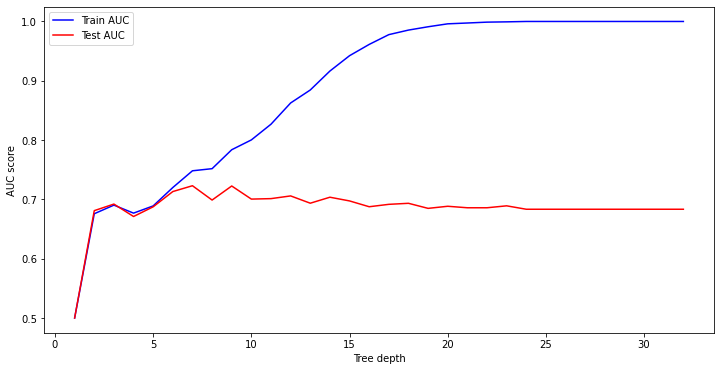

In [28]:
# for iterative model 1, we vary the max_depth of the tree
# we begin by finding the optimal value of max_depth

max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt_1st = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    dt_1st.fit(X_train_full, y_train)
    train_pred = dt_1st.predict(X_train_full)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt_1st.predict(X_test_full)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

A max_depth of around **6** seems to be optimal, we use this for building and evaluating the 1st iterative model

In [29]:
# iterative model 1 with max_depth=6 as the only change from baseline model

# Instantiate the Decision Tree model
dt_model_1st_iteration = DecisionTreeClassifier(random_state=42, max_depth=6)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on the unscaled training data
dt_1st_iter_log_loss = cross_val_score(dt_model_1st_iteration,
                                           X_train_full,
                                           y_train,
                                           scoring="neg_log_loss")

dt_1st_iter_log_loss = -(dt_1st_iter_log_loss.mean())

dt_1st_iter_log_loss

0.49068518648119086

**Evaluation of performance of 1st iteration of Decision Tree model; max_depth=6** 

This 1st Decision Tree iteration performs much better (log loss of 0.49) than the baseline (log loss of 7.7). It is within range of the logistic regression models that ranged from 0.433 to 0.575.

**5.2.2.2  2nd iterative Decision Tree  model - optimum min_samples_splits**

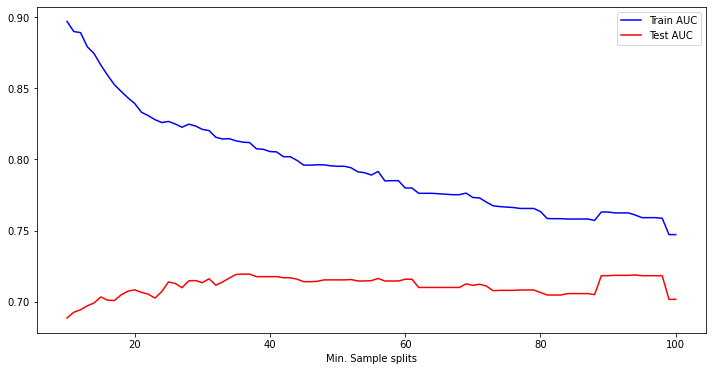

In [30]:
# for iterative model 2, we vary the min_samples_splits of the tree
# we begin by finding the optimal value of min_samples_splits 

min_samples_splits = np.arange(10, 101)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt_2nd = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=42)
    dt_2nd.fit(X_train_full, y_train)
    train_pred = dt_2nd.predict(X_train_full)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt_2nd.predict(X_test_full)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

A min_samples_split of around **91** seems to be optimal, we use this for building and evaluating the 2nd iterative model

In [31]:
# Iterative model 2 with min_samples_split=91 as the only change from baseline model

# Instantiate the Decision Tree model
dt_model_2nd_iteration = DecisionTreeClassifier(random_state=42, min_samples_split=91)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on the unscaled training data
dt_2nd_iter_log_loss = cross_val_score(dt_model_2nd_iteration,
                                           X_train_full,
                                           y_train,
                                           scoring="neg_log_loss")

dt_2nd_iter_log_loss = -(dt_2nd_iter_log_loss.mean())

dt_2nd_iter_log_loss

0.9468049987982836

**Evaluation of performance of 2nd iteration of Decision Tree model; min_samples_split=91** 

This 2nd Decision Tree iteration, where we only change the min_samples_split, also performs better (log loss of 0.94) than the baseline model(log loss of 7.7). It is however slightly worse than both the 1st decision tree iteration model with change on max_depth (log loss of 0.49) and the logistic regression models (log loss of 0.433 to 0.575).

**5.2.2.3  3rd iterative Decision Tree  model - optimum min_samples_leaf**

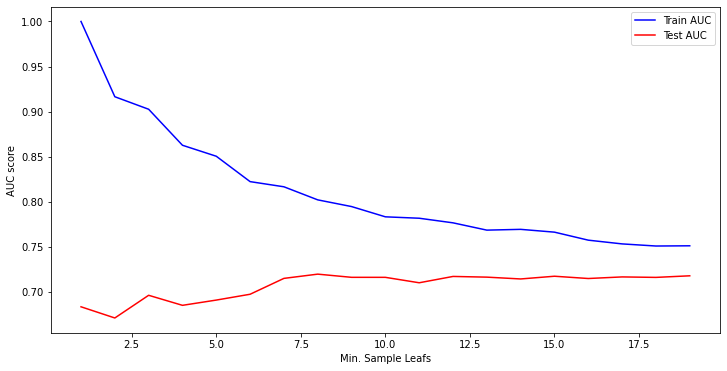

In [32]:
# for iterative model 3, we vary the min_samples_leaf of the tree
# we begin by finding the optimal value of min_samples_leaf

min_samples_leafs = np.arange(1, 20)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt_3rd = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    dt_3rd.fit(X_train_full, y_train)
    train_pred = dt_3rd.predict(X_train_full)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt_3rd.predict(X_test_full)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()


A min_sample_leafs of around **16** seems to be optimal,  we use this for building and evaluating the 3rd iterative model

In [33]:
# Iterative model 3 with min_samples_leaf=16 as the only change from baseline model

# Instantiate the Decision Tree model
dt_model_3rd_iteration = DecisionTreeClassifier(random_state=42, min_samples_leaf=16)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on the unscaled training data
dt_3rd_iter_log_loss = cross_val_score(dt_model_3rd_iteration,
                                           X_train_full,
                                           y_train,
                                           scoring="neg_log_loss")

dt_3rd_iter_log_loss = -(dt_3rd_iter_log_loss.mean())

dt_3rd_iter_log_loss

1.3306273228242476

**Evaluation of performance of 3rd iteration of Decision Tree model; min_samples_leaf=16** 

This 3rd Decision Tree iteration, where we only vary the min_samples_leaf, also performs better (log loss of 1.33) than the baseline (log loss of 7.7). However, it doesn't do as well in reducing the log loss as the previous decision tree iterations (with change in max_depth and min_samples_split and the earlier logistic regression models (log loss of 0.433 to 0.575).

**5.2.2.4   4th iterative Decision Tree  model - vary all three parameters i.e. max_depth, min_samples_split and min_samples_leaf**

In [34]:
# Iterative model 4 with max_depth=6, min_samples_split=91 and min_samples_leaf=16

# Instantiate the Decision Tree model
dt_model_4th_iteration = DecisionTreeClassifier(random_state=42,
                                                max_depth=6,
                                                min_samples_split=91,
                                                min_samples_leaf=16)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on the unscaled training data
dt_4th_iter_log_loss = cross_val_score(dt_model_4th_iteration,
                                           X_train_full,
                                           y_train,
                                           scoring="neg_log_loss")

dt_4th_iter_log_loss = -(dt_4th_iter_log_loss.mean())

dt_4th_iter_log_loss

0.4056777987939791

**Evaluation of performance of 4th iteration of Decision Tree model; varying all three parameters i.e. max_depth, min_samples_split and min_samples_leaf** 

This final Decision Tree iteration, where we vary all three parameters using the optimum values we found in the previous iterations, produces a log loss of approx 0.406. This is the lowest logloss so far and therefore this is the best performing model so far for the decision trees as it's lower than the baseline decision tree log loss of 7.7 and the decision tree iterations models (with log loss of 0.49 to 1.33). This model also outperforms the earlier logistic regression models (with log loss of 0.433 to 0.575).

**5.2.3 Summary on Decision Tree Modelling**

We built a baseline  Decision Tree model with no tuning/pruning with a resultant log loss of 7.7; and 3 iterative models where we tuned different hyperparameters with resultant log loss of 0.49 to 1.33 and a final Decision Tree model with all hyperparameters of previous iterations. This final model is 
therefore, the best model found so far with a log loss of 0.406. It is the best of the Decision Tree and Logistic regression models. This model has a max_depth=6, min_samples_split=91 and            min_samples_leaf=16.

<hr style="border:1px solid gray">

### 5.3 Random Forest Modelling

The third and final model type we will look into to provide ABC Bank with an optimal solution is Random Forest. Just as before, we will commence with a baseline model and then create iterative models to tune the hyperparameters of the model to hopefully get an even better performing model.

GridSearchCV will be utilised this time round, in tuning the Random Forest model, unlike in the Logistic regression model where we kept varying parameters 'manually' i.e. one by one and unlike the Decision tree model tuning where we tried to get optimal parameters from a range of values individually for each parameter.

**5.3.1 Build a Baseline Random Forest Model**

We start by establishing a baseline Random Forest model that makes use of the preprocessed data before scaling, since this is a tree based model which does not require data scaling.

In [35]:
# Instantiate the Random Forest model with default parameters
forest_baseline_model = RandomForestClassifier(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on the unscaled training data
forest_baseline_log_loss = cross_val_score(forest_baseline_model,
                                           X_train_full,
                                           y_train,
                                           scoring="neg_log_loss")

forest_baseline_log_loss = -(forest_baseline_log_loss.mean())

forest_baseline_log_loss

0.3805422560660256

**Evaluation of baseline Random Forest model** 

The baseline Random Forest model with default parameters results in a log loss of 0.38. This is the best performing model so far compared to all the Logistic Regression Models (with log loss ranging from 0.433 to 0.575) and all the Decision Tree models (with log loss ranging from 0.406 to 7.7). Nonetheless, we would like to tune the model for even better performance.

**5.3.2 Using GridSearchCV Identify optimal Random Forest Models**

Despite the Baseline Random Forest model producing the best log loss i.e. the lowest so far, we shall perform a hyperparameter tuning exercise to see if we can produce an even better model. 

For this exercise, we make use of GridSearchCV a combinatorial grid search to find an optimal combination of parameters for the baseline Random Forest model; unlike in the previous model types, where we tuned the parameters gradually. 

In [36]:
# define the parameter grid with different values; 
# choice of values will be guided by those used to tune the previous decision tree estimators
param_grid = {
    "n_estimators": [10, 30, 100],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 6, 9],
    "min_samples_split": [91, 115],
    "min_samples_leaf": [16, 18],
}

In [37]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(forest_baseline_model, param_grid)
grid_search.fit(X_train_full, y_train)

print(f"Optimal Parameters: {grid_search.best_params_}")


Optimal Parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 16, 'min_samples_split': 91, 'n_estimators': 100}


We use the optimal parameters from GridSearchCV to build the optimal Random Forest model and assess its performance.

In [38]:
# Instantiate the iterative Random forest model with optimal parameters from GridSearchCV
forest_iterative_model = RandomForestClassifier(random_state=42,
                                                criterion='entropy',
                                                max_depth=9,
                                                min_samples_leaf=16,
                                                min_samples_split=91,
                                                n_estimators=100)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on the unscaled training data
forest_iterative_log_loss = cross_val_score(forest_iterative_model,
                                           X_train_full,
                                           y_train,
                                           scoring="neg_log_loss")

forest_iterative_log_loss = -(forest_iterative_log_loss.mean())

forest_iterative_log_loss

0.36447661039969464

**Evaluation of Iterative Random Forest Models using GridSearchCV optimal parameters** 

The iterated Random Forest model tuned with hyperparameters resulting from GridSearchCV produces a log loss of 0.36, which is an improvement to the baseline Random Forest that uses default parameters with log loss of 0.38. This is the best performing model so far compared to all the previous Logistic Regression Models (with log loss ranging from 0.433 to 0.575) and all the Decision Tree models (with log loss ranging from 0.406 to 7.7).

**5.3.3 Feature Importance**

We also investigate and visualize how important each feature is to the Random Forest models.

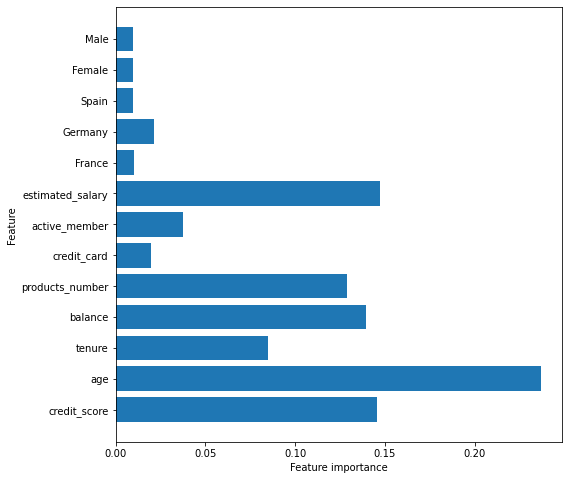

In [39]:
# Investigate feature importance for baseline Random Forest model

# fit the baseline Random forest model
forest_baseline_model.fit(X_train_full, y_train)

# function to plot feature importance
def plot_feature_importances(model):
    n_features = X_train_full.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), forest_baseline_model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_full.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(forest_baseline_model)

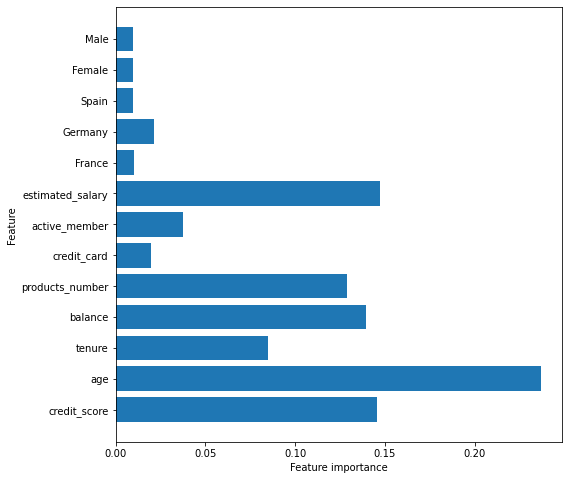

In [40]:
# Investigate feature importance for optimal Random Forest model

# fit the optimal forest model
forest_iterative_model.fit(X_train_full, y_train)

# plot feature importance
plot_feature_importances(forest_iterative_model)

It's noted that age is the feature with highest importance to the model. We also note that credit_score, estimated salary and balance have significant import in both Random Forest models. Gender and country portray least importance.

**5.3.4 Summary on Random Forest Modelling**

A baseline Random Forest model with default parameters as well as an optimal Random Forest with optimised parameters are built. The optimal Random forest model (with a log loss of 0.36) that uses GridSearchCV produced optimal parameters, outperforms all the previous models i.e. the Logistic Regression Models (with log loss ranging from 0.433 to 0.575), the Decision Tree models (with log loss ranging from 0.406 to 7.7) and the baseline Random Forest model  that uses default paramaters (with log loss of 0.38). 

We used GridSearchCV to provide a range of parameter values to work with, guided by the graphical displays of the previous Decision Tree Model iterations when preparing the parameter grid. This final and best model has the following parameters: criterion='entropy', max_depth=9, min_samples_leaf=16, min_samples_split=91 and n_estimators=100.   

A check on features of importance reveals age as the feature of highest importance for the Random Forest models.

<hr style="border:1px solid gray">

### 5.4 Overall Best Model Evaluation

3 model types have been built i.e. Logistic Regression, Decision Trees and Random Forest models. For each model type, we've began with a baseline model and then created iterative models by tuning the model hyperparameters. Log loss has been the metric of choice for comparing the various models' performance. However, we have used other model metrics for different applications e.g. when establishing the best parameters for tuning Decision trees we made use of ROC curves and AUC. 

After the extensive modelling involving 14 models (baseline and iterative models); the best performing model turned out to be the optimal Random Forest model with a log loss of 0.36. This model was built using optimal parameters established via GridSearchCV. The worst performing model was the baseline Decision Tree Model i.e. the untuned/unpruned model with a log loss of 7.7. 

In this final modelling step, we shall implement and evaluate this best overall model. We shall use this model to carry out predictions and evaluate it's performance metrics i.e. Precision, Recall, Accuracy and f1 Score. We shall also visualize a confusion matrix for the same.

In [41]:
# Fit the model, on the training data only
forest_iterative_model.fit(X_train_full, y_train)

#  Predict on both the training and test data
y_hat_train = forest_iterative_model.predict(X_train_full)
y_hat_test = forest_iterative_model.predict(X_test_full)

# Calculate precision, recall, accuracy, and F1 score of the best classifier on train and test data
print('Training Precision for best Random Forest model: ', precision_score(y_train, y_hat_train))
print('Testing Precision for best Random Forest model: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall for best Random Forest model: ', recall_score(y_train, y_hat_train))
print('Testing Recall for best Random Forest model: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy for best Random Forest model: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy for best Random Forest model: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score for best Random Forest model: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score for best Random Forest model: ', f1_score(y_test, y_hat_test))

Training Precision for best Random Forest model:  0.8657142857142858
Testing Precision for best Random Forest model:  0.8590909090909091



Training Recall for best Random Forest model:  0.3935064935064935
Testing Recall for best Random Forest model:  0.38028169014084506



Training Accuracy for best Random Forest model:  0.8629333333333333
Testing Accuracy for best Random Forest model:  0.8644



Training F1-Score for best Random Forest model:  0.5410714285714286
Testing F1-Score for best Random Forest model:  0.5271966527196653


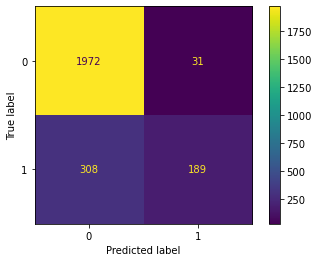

In [42]:
# Visualize the confusion matrix of the overall best model, on the test set
cm = confusion_matrix(y_test, y_hat_test, labels=forest_iterative_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_iterative_model.classes_)
disp.plot()
plt.grid(False) 
plt.show()

**Evaluation of the Overall Best Model - the Random Forest Model with GridSearchCV optimal parameters** 

With an accuracy of 86%, this model would assign the correct label about 86% of the time. This is better than a 'dummy' model - that would always predict the majority class (class 0) i.e a model that always predicted that no customer would leave the bank. Such a dummy model, would have an accuracy of 79.6%.

The recall score is quite low at about 38% on the testing data; whereas the Precision is relatively higher at about 86%. This means that our model will miss out on a good number of customers who are leaving, and by the time it prescribes a customer as leaving, it will almost always be correct. This might be tolerable depending on the client's plans for those customers who are leaving. On the other hand, if the Bank wants to identify as many customers who are about to leave including being willing to err on the side of identifying 'loyal' customers as potential 'leavers', say for the purpose of carrying out mitigation measures to prevent this attrition, the model may have to be adjusted to allow for a higher recall and lower precision. The confusion matrix displays the distribution of the various predicted data versus true data for the test set. These would be theinputs to the calculations of the evaluation metrics of Recall, Precision, Accuracy and f1 Score.

There may be need for further tuning of the model to improve on the f1 score which is relatively low at 53% for our overall best model.

The training and test scores for each of the metrics are generally quite close, implying our overall best model is not overfitting. 

<hr style="border:1px solid gray">

## 6.0 Conclusions, Recommendations and Next Steps

<img src="image_coins-1523383_1280.jpg" width="300" height="50" align="left">

Image by Steve Buissinne from Pixabay

### Conclusions

The aim of this project analysis was to create a classification model for the client, ABC Multinational Bank, for use in predictions of customers that may leave the Bank. In predicting customer attrition (churn),  the client desires to create and implement intervention strategies targeting these customers with an aim to retain them before they actualize their exit. As well, the Bank would be able to make more informed decisions when it comes to offering certain products such as loans to its customers.

3 types of classification models were built starting with their baseline then iterative models i.e.
* Logistic Regression models
* Decision Tree models
* Random Forest models

Tuning of hyperparameters to produce best models for each model type, using an iterative approach is done. Taking into account models produced by the various iterations, a total of 14 models are built with varying logloss. The optimised Random Forest model emerges the best performing model with a log loss of 0.36 against the other models with log loss of 0.38 to 7.7. This model is evaluated for its performance against certain metrics. In particular the model Recall is noted to be relatively low, while the Precision is relatively higher. Importance of features to the Random Forest models is also investigated. From the foregoing observations, the following recommendations will be made to the client, ABC Multinational Bank.
 
### Recommendations
1. The client will be advised to make use of the overall best model to predict customers that are likely to leave the Bank and target intervention strategies on these clients, aiming to retain them before they exit. 
2. This model may not be sufficient to decide on best candidates for provision of loans, especially judging from the performance of some evaluation metrics, and thus the client should be cautious in utilising it as such. 
3. The client will be advised to particularly pay attention to age of customers, credit_score, estimated salary and balance as features of importance in determining attrition. As such, the client should bear these aspects in mind when designing intervention strategies to retain customers.

### Next Steps
For additional insights, further analysis is proposed in the following areas;
* Further tuning is proposed of the hyperparameters of the best performing model in order to lead to better performance metrics particularly the f1 Score. This further analysis could include use of XGBoost.
* Adjustment of the model's Recall and Precision could be done in line with the focus of the Bank. A further discussion with the Bank to understand their needs and focus is needed e.g. *are the intervention measures likely to be too costly, in which case, the client would want a model that is even more precise?* 